In [1]:
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# display plots in this notebook
%matplotlib inline

/Library/Python/2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


df.filter(regex='Unnamed').columns
df[filter(lambda col: col not in df.filter(regex='Unnamed').columns, df.columns)].to_csv('all_gene_summary.tsv', index=None, sep='\t')

In [3]:
df = pd.read_csv('all_gene_summary.tsv', header=0, sep='\t')

In [4]:
df['CER_RPKM_fc'] = df['Active_CD4_gene_CER_RPKM'] / df['Rest_CD4_gene_CER_RPKM']
df['diff_gene_IRI'] = df['Active_CD4_gene_IRI'] - df['Rest_CD4_gene_IRI']
df['gene_IRI_fc'] = df['Active_CD4_gene_IRI'] / df['Rest_CD4_gene_IRI']
df['polII_RPKM_fc'] = df['Active_CD4_polII_RPKM'] / df['Rest_CD4_polII_RPKM']

In [13]:
expression_fc = 1.5
polII_fc = 1.5
IRI_diff = 0.1
beta1_diff = 0.5

## expression increase: beta1 decrease

### beta1 change

In [75]:
df[(df.CER_RPKM_fc >= expression_fc) & (abs(df.diff_gene_IRI) <= IRI_diff) & (df.polII_RPKM_fc <= polII_fc) & (df.polII_RPKM_fc >= 1.0 / polII_fc) & (abs(df.diff_beta1) >= beta1_diff)].shape

(362, 30)

### beta1 increase (should be few)

In [77]:
df[(df.CER_RPKM_fc >= expression_fc) & (abs(df.diff_gene_IRI) <= IRI_diff) & (df.polII_RPKM_fc <= polII_fc) & (df.polII_RPKM_fc >= 1.0 / polII_fc) & (df.diff_beta1 >= beta1_diff)].to_csv('expression_up_IRI_and_polII_unchange_beta1_increase_gene_summary.tsv', index=None, sep='\t')

### beta1 decrease

In [11]:
print df[(df.CER_RPKM_fc >= expression_fc) & (abs(df.diff_gene_IRI) <= IRI_diff) & (df.polII_RPKM_fc <= polII_fc) & (df.polII_RPKM_fc >= 1.0 / polII_fc) & (df.diff_beta1 <= -beta1_diff)].shape
df[(df.CER_RPKM_fc >= expression_fc) & (abs(df.diff_gene_IRI) <= IRI_diff) & (df.polII_RPKM_fc <= polII_fc) & (df.polII_RPKM_fc >= 1.0 / polII_fc) & (df.diff_beta1 <= -beta1_diff)].to_csv('expression_up_IRI_and_polII_unchange_beta1_decrease_gene_summary.tsv', index=None, sep='\t')

(288, 30)


## expression increase: IRI decrease + beta1 decrease

In [12]:
df[(df.CER_RPKM_fc >= expression_fc) & (df.diff_gene_IRI <= -IRI_diff) & (df.polII_RPKM_fc <= polII_fc) & (df.polII_RPKM_fc >= 1.0 / polII_fc) & (df.diff_beta1 <= -beta1_diff)].shape

(118, 30)

In [6]:
df[(df.CER_RPKM_fc >= expression_fc) & (df.diff_gene_IRI <= -IR_diff) & (df.polII_RPKM_fc <= polII_fc) & (df.polII_RPKM_fc >= 1.0 / polII_fc) & (df.diff_beta1 <= -beta1_diff)].to_csv('expression_up_IRI_and_polII_unchange_beta1_decrease_gene_summary.tsv', index=None, sep='\t')

NameError: name 'IR_diff' is not defined

## correlation between IRI diff and beta1 diff

In [22]:
boxplot_df = df.loc[:,['diff_gene_IRI', 'diff_beta1']].replace({np.inf: np.nan, -np.inf: np.nan}).dropna().sort_values(by='diff_gene_IRI')
num_bins = 5
boxplot_df['diff_gene_IRI_group'] = reduce(lambda x, (i,y): x + [i]*len(y), enumerate(np.array_split(range(boxplot_df.shape[0]), num_bins)), [])

In [23]:
print boxplot_df.groupby('diff_gene_IRI_group')['diff_beta1'].median()
print boxplot_df.groupby('diff_gene_IRI_group')['diff_beta1'].mean()

diff_gene_IRI_group
0   -0.285816
1   -0.189006
2   -0.175135
3   -0.100944
4   -0.057404
Name: diff_beta1, dtype: float64
diff_gene_IRI_group
0   -0.342812
1   -0.279510
2   -0.265443
3   -0.216212
4   -0.163123
Name: diff_beta1, dtype: float64


(-2, 2)

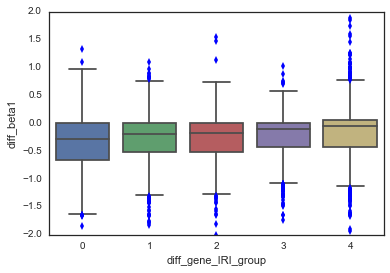

In [25]:
sns.boxplot(x='diff_gene_IRI_group', y='diff_beta1', data=boxplot_df)
plt.ylim([-2,2])

In [10]:
boxplot_df = df.loc[:,['diff_gene_IRI', 'diff_beta1']].replace({np.inf: np.nan, -np.inf: np.nan}).dropna().sort_values(by='diff_beta1')
num_bins = 5
boxplot_df['diff_beta1_group'] = reduce(lambda x, (i,y): x + [i]*len(y), enumerate(np.array_split(range(boxplot_df.shape[0]), num_bins)), [])

In [11]:
print boxplot_df.groupby('diff_beta1_group')['diff_gene_IRI'].median()
print boxplot_df.groupby('diff_beta1_group')['diff_gene_IRI'].mean()

diff_beta1_group
0   -0.021039
1   -0.018314
2   -0.014623
3   -0.012540
4   -0.011393
Name: diff_gene_IRI, dtype: float64
diff_beta1_group
0   -0.037574
1   -0.038132
2   -0.028042
3   -0.024827
4   -0.018413
Name: diff_gene_IRI, dtype: float64


(-0.3, 0.3)

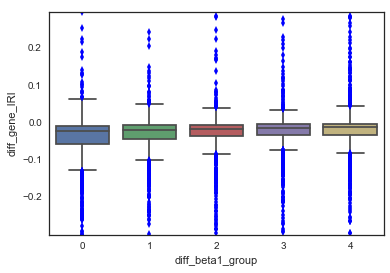

In [12]:
sns.boxplot(x='diff_beta1_group', y='diff_gene_IRI', data=boxplot_df)
plt.ylim([-0.3,0.3])

In [13]:
scipy.stats.pearsonr(boxplot_df.iloc[:,0], boxplot_df.iloc[:,1])

(0.032944993989615409, 0.0035826795373274851)

In [14]:
scipy.stats.spearmanr(boxplot_df.iloc[:,0], boxplot_df.iloc[:,1])

SpearmanrResult(correlation=0.1454660090351852, pvalue=3.1980638430316341e-38)

## correlation between IRI fc and beta1 diff

In [15]:
boxplot_df = df.loc[:,['gene_IRI_fc', 'diff_beta1']].replace({np.inf: np.nan, -np.inf: np.nan}).dropna().sort_values(by='gene_IRI_fc')
num_bins = 5
boxplot_df['gene_IRI_fc_group'] = reduce(lambda x, (i,y): x + [i]*len(y), enumerate(np.array_split(range(boxplot_df.shape[0]), num_bins)), [])

In [16]:
print boxplot_df.groupby('gene_IRI_fc_group')['diff_beta1'].median()
print boxplot_df.groupby('gene_IRI_fc_group')['diff_beta1'].mean()

gene_IRI_fc_group
0   -0.382235
1   -0.234223
2   -0.125208
3   -0.038988
4   -0.039461
Name: diff_beta1, dtype: float64
gene_IRI_fc_group
0   -0.418185
1   -0.306775
2   -0.221621
3   -0.167635
4   -0.154217
Name: diff_beta1, dtype: float64


(-2, 2)

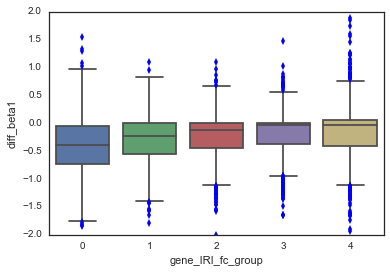

In [18]:
sns.boxplot(x='gene_IRI_fc_group', y='diff_beta1', data=boxplot_df)
plt.ylim([-2,2])

In [19]:
scipy.stats.pearsonr(boxplot_df.iloc[:,0], boxplot_df.iloc[:,1])

(0.015957649897260735, 0.16201706473297101)

In [20]:
scipy.stats.spearmanr(boxplot_df.iloc[:,0], boxplot_df.iloc[:,1])

SpearmanrResult(correlation=0.23351453692921637, pvalue=1.2689131475453988e-95)

In [5]:
boxplot_df = df.loc[:,['gene_IRI_fc', 'diff_beta1']].replace({np.inf: np.nan, -np.inf: np.nan}).dropna().sort_values(by='diff_beta1')
num_bins = 5
boxplot_df['diff_beta1_group'] = reduce(lambda x, (i,y): x + [i]*len(y), enumerate(np.array_split(range(boxplot_df.shape[0]), num_bins)), [])

In [6]:
print boxplot_df.groupby('diff_beta1_group')['gene_IRI_fc'].median()
print boxplot_df.groupby('diff_beta1_group')['gene_IRI_fc'].mean()

diff_beta1_group
0    0.266020
1    0.314376
2    0.365310
3    0.426295
4    0.470288
Name: gene_IRI_fc, dtype: float64
diff_beta1_group
0    0.774902
1    0.559555
2    0.611990
3    1.111444
4    0.986853
Name: gene_IRI_fc, dtype: float64


/Library/Python/2.7/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(0, 2)

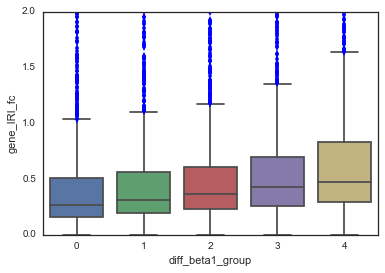

In [7]:
sns.boxplot(x='diff_beta1_group', y='gene_IRI_fc', data=boxplot_df)
plt.ylim([0,2])

In [8]:
scipy.stats.pearsonr(boxplot_df.iloc[:,0], boxplot_df.iloc[:,1])

(0.015957649897260735, 0.16201706473297101)

In [9]:
scipy.stats.spearmanr(boxplot_df.iloc[:,0], boxplot_df.iloc[:,1])

SpearmanrResult(correlation=0.23351453692921637, pvalue=1.2689131475453988e-95)

## correlation between IP measured beta and Sup measured beta

In [23]:
ip_beta_df = df.loc[:,['gene_id', 'rest_beta1', 'active_beta1', 'diff_beta1', 'rest_beta2', 'active_beta2', 'diff_beta2']]
for column in ip_beta_df.columns[1:]:
    ip_beta_df.rename(columns={column: 'ip_' + column}, inplace=True)

In [14]:
sup_df = pd.read_csv('/Users/zzeng/Desktop/quick_visit/IR_Tian_Yi/Bru-seq/Jan2017/Non_IP/Sup/Combine/IRI/all_gene_list/all_gene_summary.tsv', header=0, sep='\t')
sup_beta_df = sup_df.loc[:,['gene_id', 'rest_beta1', 'active_beta1', 'diff_beta1', 'rest_beta2', 'active_beta2', 'diff_beta2']]
for column in sup_beta_df.columns[1:]:
    sup_beta_df.rename(columns={column: 'sup_' + column}, inplace=True)

In [24]:
beta_df = ip_beta_df.merge(sup_beta_df, on='gene_id')

In [27]:
beta_df

,gene_id,ip_rest_beta1,ip_active_beta1,ip_diff_beta1,ip_rest_beta2,ip_active_beta2,ip_diff_beta2,sup_rest_beta1,sup_active_beta1,sup_diff_beta1,sup_rest_beta2,sup_active_beta2,sup_diff_beta2
0,RNF14,0.763258,0.076487,-0.686772,1.840225,1.600521,-0.239705,0.071511,0.016192,-0.055319,0.000000,0.136043,0.136043
1,UBE2Q2,0.380922,0.334396,-0.046526,2.233338,2.096659,-0.136680,0.195238,0.000000,-0.195238,0.667621,0.147549,-0.520072
2,RNF10,0.448480,0.144809,-0.303671,1.705500,1.547521,-0.157979,0.096333,0.000000,-0.096333,0.549391,0.289096,-0.260295
3,RNF11,0.385245,0.000000,-0.385245,2.262511,1.725436,-0.537075,0.000000,0.000000,0.000000,1.099336,0.456211,-0.643125
4,C16orf13,0.000000,0.805388,0.805388,0.247393,0.274826,0.027433,0.305875,0.000000,-0.305875,0.201958,0.000000,-0.201958
5,MVB12B,0.860485,0.053396,-0.807089,1.904512,1.798396,-0.106115,0.317429,0.041308,-0.276121,0.557860,0.987576,0.429716
6,PMM1,0.000000,0.000000,0.000000,1.413633,1.346104,-0.067528,0.493783,0.042267,-0.451516,0.981368,0.385905,-0.595463
7,FHIT,0.490365,0.456706,-0.033659,1.228479,0.607639,-0.620840,0.328303,0.000000,-0.328303,0.820588,0.120178,-0.700410
8,ZNF709,1.175576,1.069829,-0.105747,1.355676,0.884700,-0.470976,0.000000,0.000000,0.000000,0.903697,0.248676,-0.655021
9,ZNF708,1.169069,0.951633,-0.217435,2.300149,1.678351,-0.621799,0.000000,0.000000,0.000000,0.692278,0.383568,-0.308710


In [28]:
scipy.stats.pearsonr(beta_df['ip_rest_beta1'], beta_df['sup_rest_beta1'])

(-0.13909407465841914, 1.3206982852521605e-34)

In [29]:
scipy.stats.pearsonr(beta_df['ip_active_beta1'], beta_df['sup_active_beta1'])

(0.34304479367861329, 8.331151962090045e-212)

In [30]:
scipy.stats.pearsonr(beta_df['ip_diff_beta1'], beta_df['sup_diff_beta1'])

(-0.10484640388193014, 2.7325980054781844e-20)

In [31]:
scipy.stats.pearsonr(beta_df['ip_rest_beta2'], beta_df['sup_rest_beta2'])

(-0.019205661261729259, 0.09178670549120635)

In [32]:
scipy.stats.pearsonr(beta_df['ip_active_beta2'], beta_df['sup_active_beta2'])

(0.11311727571699919, 2.2457760322366516e-23)

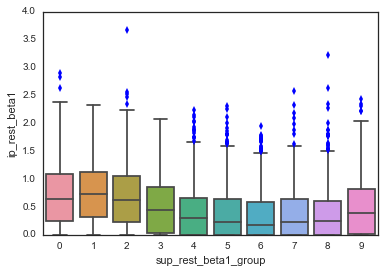

In [46]:
beta_df.sort_values(by='sup_rest_beta1', inplace=True)
num_bins = 10
beta_df['sup_rest_beta1_group'] = reduce(lambda x, (i, y): x + [i] * len(y), enumerate(np.array_split(range(beta_df.shape[0]), num_bins)), [])

sns.boxplot(x='sup_rest_beta1_group', y='ip_rest_beta1', data=beta_df)

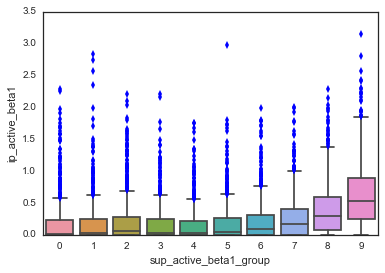

In [48]:
beta_df.sort_values(by='sup_active_beta1', inplace=True)
num_bins = 10
beta_df['sup_active_beta1_group'] = reduce(lambda x, (i, y): x + [i] * len(y), enumerate(np.array_split(range(beta_df.shape[0]), num_bins)), [])

sns.boxplot(x='sup_active_beta1_group', y='ip_active_beta1', data=beta_df)

In [5]:
df.shape

(7905, 27)

In [70]:
df = pd.read_csv('all_gene_summary_with_PST.tsv', header=1, sep='\t', skiprows=0)

In [71]:
df.drop(labels=df.filter(regex=r'Unnamed').columns, axis=1, inplace=True)

In [22]:
df.columns

Index([u'gene_id', u'Rest_CD4_gene_CER_RPKM', u'Rest_CD4_gene_IRI',
       u'Active_CD4_gene_CER_RPKM', u'Active_CD4_gene_IRI',
       u'Rest_CD4_polII_RPKM', u'Active_CD4_polII_RPKM',
       u'Rest_CD4_polII_gene_IRI', u'Active_CD4_polII_gene_IRI', u'rest_beta1',
       u'rest_beta2', u'active_beta1', u'active_beta2', u'diff_beta1',
       u'diff_beta2', u'rest_PST', u'active_PST', u'diff_PST',
       u'Rest_CD4_T0_gene_CER_read_count',
       u'Rest_CD4_T30min_gene_CER_read_count',
       u'Rest_CD4_T2h_gene_CER_read_count',
       u'Active_CD4_T0_gene_CER_read_count',
       u'Active_CD4_T30min_gene_CER_read_count',
       u'Active_CD4_T2h_gene_CER_read_count', u'Rest_CD4_T0_gene_IRI',
       u'Rest_CD4_T30min_gene_IRI', u'Rest_CD4_T2h_gene_IRI',
       u'Active_CD4_T0_gene_IRI', u'Active_CD4_T30min_gene_IRI',
       u'Active_CD4_T2h_gene_IRI'],
      dtype='object')

In [72]:
Rest_T0_df = pd.read_csv('/Users/zzeng/Desktop/quick_visit/IR_Tian_Yi/Bru-seq/Jan2017/IP/Combine/IRI/Rest_CD4_ERCC_T0.quant.IRI.genes.txt', header=0, sep='\t').loc[:,['gene_id', 'gene_CER_RPKM']].rename(columns={'gene_CER_RPKM': 'Rest_CD4_nascent_transcripts_RPKM'})
Active_T0_df = pd.read_csv('/Users/zzeng/Desktop/quick_visit/IR_Tian_Yi/Bru-seq/Jan2017/IP/Combine/IRI/Active_CD4_ERCC_T0.quant.IRI.genes.txt', header=0, sep='\t').loc[:,['gene_id', 'gene_CER_RPKM']].rename(columns={'gene_CER_RPKM': 'Active_CD4_nascent_transcripts_RPKM'})
T0_df = Rest_T0_df.merge(Active_T0_df, on='gene_id').dropna()

In [73]:
T0_df['geometric_mean'] = T0_df.apply(lambda row: scipy.stats.mstats.gmean((row[1], row[2])), axis=1)
for col in T0_df.columns[1:3]:
    norm_factor = (T0_df[col] / T0_df['geometric_mean']).median()
    T0_df[col] = T0_df[col] / norm_factor
T0_df.drop(labels='geometric_mean', axis=1, inplace=True)
#T0_df['nascent_transcripts_RPKM_fc'] = Active_T0_df['Active_CD4_nascent_transcripts_RPKM'] / Rest_T0_df['Rest_CD4_nascent_transcripts_RPKM']

In [74]:
df = df.merge(T0_df, on=['gene_id'])

In [61]:
(df['Active_CD4_nascent_transcripts_RPKM'] / df['Rest_CD4_nascent_transcripts_RPKM']).describe()

count    7894.000000
mean        2.916191
std         6.619684
min         0.007261
25%         0.959086
50%         1.649460
75%         2.831364
max       276.458377
dtype: float64

In [76]:
df.to_csv('all_gene_summary_with_PST_and_nascent.tsv', index=None, sep='\t')

In [83]:
print scipy.stats.pearsonr(df['Rest_CD4_polII_RPKM'], df['Rest_CD4_nascent_transcripts_RPKM'])
print scipy.stats.spearmanr(df['Rest_CD4_polII_RPKM'], df['Rest_CD4_nascent_transcripts_RPKM'])

(0.59823066971194505, 0.0)
SpearmanrResult(correlation=0.56533064229871643, pvalue=0.0)


In [84]:
print scipy.stats.pearsonr(df['Active_CD4_polII_RPKM'], df['Active_CD4_nascent_transcripts_RPKM'])
print scipy.stats.spearmanr(df['Active_CD4_polII_RPKM'], df['Active_CD4_nascent_transcripts_RPKM'])

(0.48258882292518906, 0.0)
SpearmanrResult(correlation=0.37187506308316748, pvalue=2.0678108985909212e-257)


In [86]:
df['polII_RPKM_fc'] = df['Active_CD4_polII_RPKM'] / df['Rest_CD4_polII_RPKM']
df['nascent_transcripts_RPKM_fc'] = df['Active_CD4_nascent_transcripts_RPKM'] / df['Rest_CD4_nascent_transcripts_RPKM']

In [91]:
df.loc[:,['polII_RPKM_fc', 'nascent_transcripts_RPKM_fc']].corr(method='spearman')

,polII_RPKM_fc,nascent_transcripts_RPKM_fc
polII_RPKM_fc,1.000000,0.595371
nascent_transcripts_RPKM_fc,0.595371,1.000000


In [107]:
up_df = df[(df.Active_CD4_gene_CER_RPKM >= 1) & (df.Active_CD4_gene_CER_RPKM / df.Rest_CD4_gene_CER_RPKM >= 1.5)]

In [108]:
boxplot_df = pd.concat((pd.DataFrame({'nascent_transcripts_RPKM': up_df['Rest_CD4_nascent_transcripts_RPKM'], 'type': 'Resting'}),
                        pd.DataFrame({'nascent_transcripts_RPKM': up_df['Active_CD4_nascent_transcripts_RPKM'], 'type': 'Activated'})))

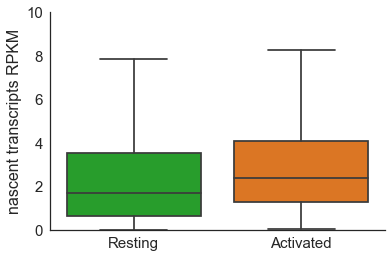

In [109]:
colors=['green', 'orange']
sns.set_palette(sns.xkcd_palette(colors))

plt.figure()
sns.boxplot(x='type', y='nascent_transcripts_RPKM', data=boxplot_df, showfliers=False)
plt.ylim([0, 10])
plt.xlabel('', fontsize=20)
plt.ylabel('nascent transcripts RPKM', fontsize=16)
plt.title('')
plt.legend(loc='upper right', fontsize=12)
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine()
#plt.savefig("IRI_down_gene_list/gene_normalized_log2_read_count_decay_boxplot.png", format="png")